In [1]:
#Bibliothèques pour l'analyse exploratoire
import numpy as np #pour les opérations numériques
import pandas as pd #Pandas pour l'analyse de données

#Bibliothèques pour la visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

#Pour que les figures apparaissent dans le notebook
%matplotlib inline

#Pour créer les modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Pour évaluer les modèles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
#Importation de la base de données
cardio=pd.read_csv('Maladie_Cardio.csv')

#Afficher les dimension de la base de données
cardio.shape # (lignes, colonnes)

(303, 14)

In [3]:
#L'analyse exploratoire des données
#Afficher les 5 premieres lignes
cardio.head()

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Afficher les 10 premieres lignes
cardio.head(10)

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#Afficher combien des 1 et des 0 nous avons dans la variable target
cardio.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#Afficher les pourcentage de chaque valeur de la variable target (Normaliser)
cardio.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

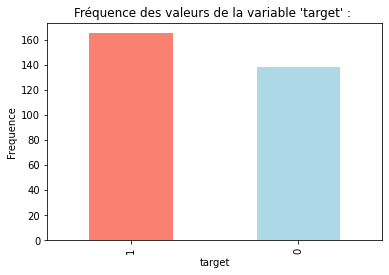

In [7]:
#Afficher un graphe à barres representant les valeurs de la variable target
plt.xlabel('target')
plt.ylabel('Frequence')
plt.title("Fréquence des valeurs de la variable 'target' : ")
cardio.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.show()

In [8]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   genre    303 non-null    int64  
 2   td       303 non-null    int64  
 3   psr      303 non-null    int64  
 4   chol     303 non-null    int64  
 5   gaj      303 non-null    int64  
 6   ecgr     303 non-null    int64  
 7   fcm      303 non-null    int64  
 8   effang   303 non-null    int64  
 9   dinde    303 non-null    float64
 10  penteff  303 non-null    int64  
 11  nvc      303 non-null    int64  
 12  rshal    303 non-null    int64  
 13  target   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
cardio.describe()

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#Afficher combien des 1 et des 0 nous avons dans la variable 'genre'
cardio.genre.value_counts()

1    207
0     96
Name: genre, dtype: int64

In [11]:
#Etudions la relation entre les variables 'target' et 'genre'
pd.crosstab(cardio.target, cardio.genre)

genre,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

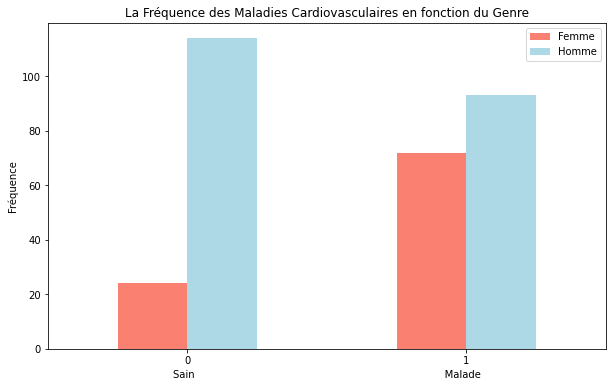

In [12]:
#Modeliser le tableau ci-dessus

pd.crosstab(cardio.target, cardio.genre).plot(ylabel ="Fréquence",kind='bar', 
                                            figsize=(10,6),
                                            color=["salmon", "lightblue"])

plt.title("La Fréquence des Maladies Cardiovasculaires en fonction du Genre")
plt.xlabel("Sain                                                                                Malade")
plt.ylabel("Fréquence")
plt.legend(["Femme", "Homme"])
plt.xticks(rotation=0)

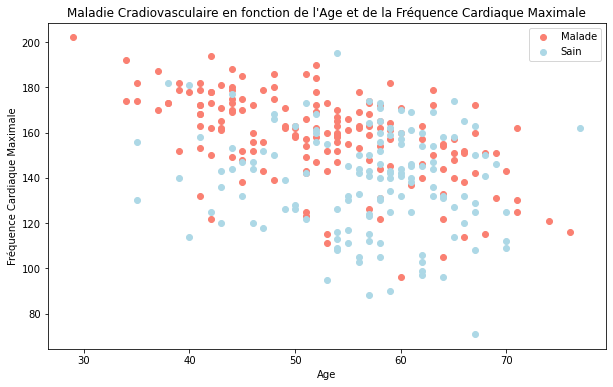

In [13]:
#Etudions la relation en entre l'age et la fréquence cardiaque maximale
plt.figure(figsize=(10,6))

#Considerons les examples positives
plt.scatter(cardio.age[cardio.target==1],
           cardio.fcm[cardio.target==1],
           c='salmon')
#Considérons les examples négative toujours dans le même graphe
plt.scatter(cardio.age[cardio.target==0],
           cardio.fcm[cardio.target==0],
           c='lightblue')

plt.title("Maladie Cradiovasculaire en fonction de l'Age et de la Fréquence Cardiaque Maximale")
plt.xlabel("Age")
plt.ylabel("Fréquence Cardiaque Maximale")
plt.legend(["Malade", "Sain"])

Text(0.5, 0, 'Age')

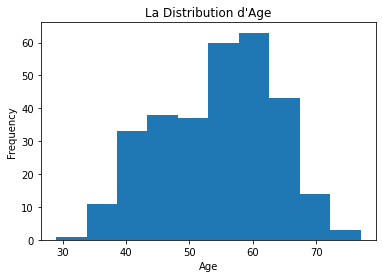

In [14]:
#Etudions la distribution de l'age

cardio.age.plot.hist()
plt.title('La Distribution d\'Age')
plt.xlabel('Age')

In [15]:
#Etudions la relation entre les variables 'target' et 'td (type de la douleur thoracique)'
pd.crosstab(cardio.td, cardio.target)

target,0,1
td,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

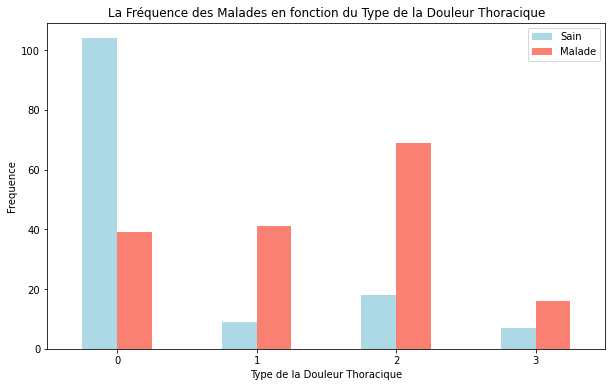

In [16]:
#Modélisons les deux variables 
pd.crosstab(cardio.td, cardio.target).plot(kind='bar',
                                          figsize=(10,6),
                                          color=["lightblue", "salmon"])

#Ajoutons les descriptions
plt.title("La Fréquence des Malades en fonction du Type de la Douleur Thoracique")
plt.xlabel("Type de la Douleur Thoracique")
plt.ylabel("Frequence")
plt.legend(["Sain", "Malade"])
plt.xticks(rotation = 0)

In [17]:
#La correlation entre les variables
corr_matrix = cardio.corr()
corr_matrix

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
genre,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
td,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
psr,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
gaj,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ecgr,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
fcm,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
effang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
dinde,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

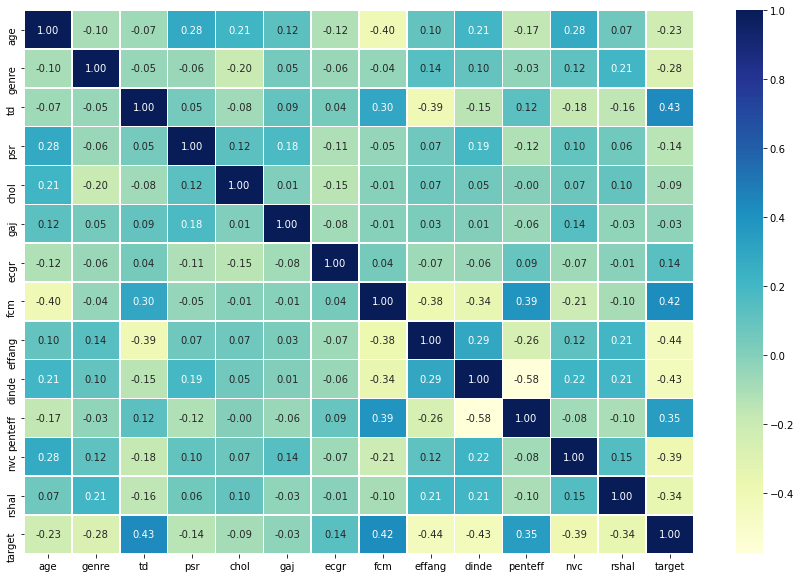

In [18]:
#Modélisons le résultat ci-dessus 
corr_matrix = cardio.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [19]:
#Passons au Modeling
cardio.head()

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#Séparons la variable 'target' du reste des variables
X = cardio.drop("target", axis=1)

#La variable 'target'
y=cardio.target.values

In [21]:
#(Pas de variable 'target')
X.head()

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
#Les Cibles
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
#Separons les données en deux, une partie pour le training(80%) et une autre(20%) pour le test

#random.seed pour la reproductibilité
np.random.seed(42)

#Separons la dataset (train et test)
X_train, X_test, y_train, y_test = train_test_split(X, #Variables indépendantes
                                                   y, #Variable dépendante
                                                   test_size = 0.2) #pourcentage des données à utliser dans le training

In [24]:
X_train.head()

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [25]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

In [26]:
X_test.head()

,age,genre,td,psr,chol,gaj,ecgr,fcm,effang,dinde,penteff,nvc,rshal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [27]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

In [28]:
#Le choix du modèle 

#Mettons les modèles dans un dictionnaire
models={'KNN' : KNeighborsClassifier(),
       'Logistic Regression' : LogisticRegression(),
       'Random Forest' : RandomForestClassifier()}

#Créer une fonction réalisons le fit et le score des modèles
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Ajuste et evalue des modèles de machine learning donnés
    models : un dictionnaire pour les differents modèles de Scikit-Learn
    X_train : les données du training
    X_test : les données du test
    y_train : labels associés avec les données du training
    y_test : labels associés avec les données du test
    """
    #Random seed pour des résultats reproductible
    np.random.seed(42)
    #liste pour enregistrer les scores des modèles 
    model_scores = {}
    #Boucler sur les modèles
    for name, model in models.items():
        #fit le modèle pour la data
        model.fit(X_train, y_train)
        #Evaluer le modèle et ajouter son score à model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

D:\Programmes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:xlabel='Modèle ML'>

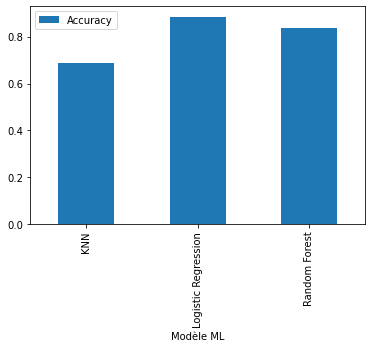

In [30]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar(xlabel = 'Modèle ML')

In [31]:
#L'amélioration (tuning) des hyperparametres et la cross-validation

#Améliorer le KNN (Tuning du KNN)

#Créons une liste des scores du training
train_scores = []

#Créons une liste des scores du test
test_scores = []

#Créons une liste des différentes valeurs pour les n_neighbors
neighbors = range(1, 21)

#Définir l'algorithme
knn = KNeighborsClassifier()

#Boucler sur les différentes valeurs de neighbors
for i in neighbors : 
    knn.set_params(n_neighbors = i) #Définir la valeur de neighbors
    
    #Fit
    knn.fit(X_train, y_train)
    
    #Mettre à jour les scores du training
    train_scores.append(knn.score(X_train, y_train))
    
    #Mettre à jour les scores du test
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Le Score KNN maximum sur la dataset du test est: 75.41%


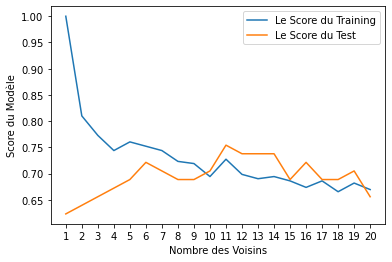

In [34]:
#Modeliser les valeurs ci-dessus

plt.plot(neighbors, train_scores, label='Le Score du Training')
plt.plot(neighbors, test_scores, label='Le Score du Test')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Nombre des Voisins")
plt.ylabel("Score du Modèle")
plt.legend()

print(f'Le Score KNN maximum sur la dataset du test est: {max(test_scores)*100:.2f}%')

In [35]:
#Améliorer le modèle par RandomizedSearchCV

#Differents hyperparametres de LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#Differents hyperparametres de RandomForrestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [36]:
#Définir random seed
np.random.seed(42)

#Definir une recherche à hyperparametre aléatoire pour Logistique Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit le modèle de recherche à hyperparametre aléatoire
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [39]:
#Améliorer le modèle RandomForestClassifier
np.random.seed(42)

#Definir une recherche à hyperparametre aléatoire pour RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#Fit le modèle de recherche à hyperparametre aléatoire
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
#Trouver les meiller hyperparametres
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
#Evaluer le modèle de recherche aléatoire de RandomForest
rs_rf.score(X_test, y_test)

0.8688524590163934

In [42]:
#Améliorer le modèle avec GridSearchCV

#Differents hyperparametres de LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#Definir une recherche à hyperparametre aléatoire pour Logistique Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

#Fit le modèle de recherche à hyperparametre Grid
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
#Verifier le meiller hyperparametres
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [44]:
#Evaluer le modèle
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [45]:
#Evaluer le modèle de classification au delà de l'accuracy

#Mener des prédictions sur la data set
y_preds = gs_log_reg.predict(X_test)

In [46]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'La Courbe ROC')

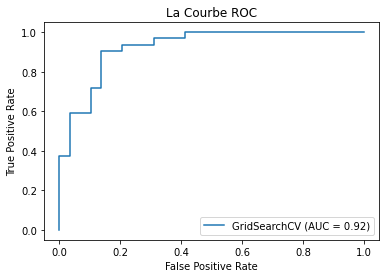

In [48]:
#Courbe ROC et Scores AUC

#Importer la fonction de la courbe ROC à partir du module metrics
from sklearn.metrics import plot_roc_curve

#Afficher la courbe ROC et calculer l'AUC
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.title("La Courbe ROC")

In [49]:
#Matrice de confusion

#Afficher la mtrice de confusion
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


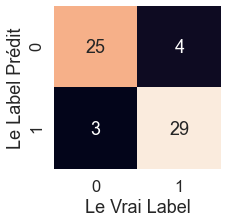

In [50]:
#Importer Seaborn
import seaborn as sns
sns.set(font_scale=1.5) #Augmenter le font size

def plot_conf_mat(y_test, y_preds) : 
    """
    Affiche une matrice de confusion en utilisant la seaborn heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Le Vrai Label")
    plt.ylabel("Le Label Prédit")
    
plot_conf_mat(y_test, y_preds)

In [51]:
#Le rapport de Classification
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
#Verifier les meilleurs hyperparametres
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [53]:
#Importer le cross_val_score
from sklearn.model_selection import cross_val_score

#Instantier le meilleur modèle par les meilleurs hyperparametres (Trouvés par GridSerchCV)
clf = LogisticRegression (C = 0.23357214690901212, 
                          solver = 'liblinear')

In [54]:
#Le score d'accuracy cross-validé
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [56]:
#Le score de précision cross-validé
cv_precision = np.mean(cross_val_score(clf,
                                      X,
                                      y,
                                      cv = 5,
                                      scoring = 'precision'))
cv_precision

0.8215873015873015

In [57]:
#Le score du Recall cross-validé
cv_recall = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   cv=5,
                                   scoring = 'recall'))
cv_recall

0.9272727272727274

In [58]:
#Le score F1 cross-validé
cv_f1 = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="f1"))
cv_f1

0.8705403543192143

<AxesSubplot:title={'center':'Metriques Cross-Validés'}>

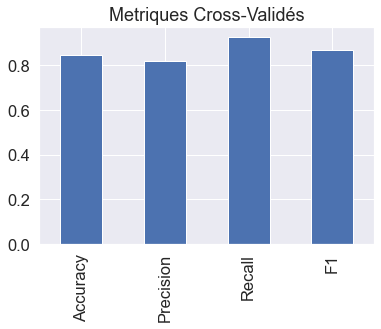

In [59]:
#Visuliser ces metriques
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Metriques Cross-Validés",
                     legend=False)

In [60]:
#Ajuster une instance de LogisticRegression
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [61]:
#Verifier coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [62]:
#Matcher les features aux colonnes
features_dict = dict(zip(cardio.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'genre': -0.9042408714480176,
 'td': 0.6747282766540338,
 'psr': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'gaj': 0.04787688669240361,
 'ecgr': 0.3349018562558094,
 'fcm': 0.024729384743360134,
 'effang': -0.631204028843173,
 'dinde': -0.575909185434028,
 'penteff': 0.47095119664446533,
 'nvc': -0.6516535002884537,
 'rshal': -0.6998420233395882}

<AxesSubplot:title={'center':"L'Importance des Features"}>

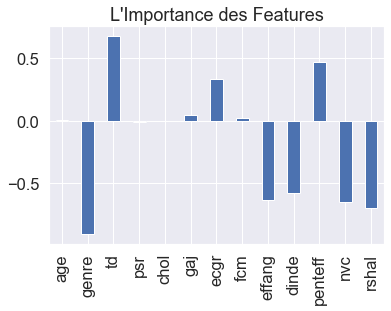

In [63]:
#Visualiser l'importance des features
features_cardio = pd.DataFrame(features_dict, index=[0])
features_cardio.T.plot.bar(title="L'Importance des Features", legend = False)